In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [360]:
df = pd.read_csv('povstat_processed.csv', index_col=0)
df

,Variable,Year,province,value,adm_level,region,unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos
...,...,...,...,...,...,...,...
3600,Magnitude of Subsistence Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3601,Magnitude of Subsistence Poor Population,2006,Zamboanga del Sur,"268,576",Province,Region IX,population
3602,Magnitude of Subsistence Poor Population,2009,Zamboanga del Sur,"261,992",Province,Region IX,population
3603,Magnitude of Subsistence Poor Population,2012,Zamboanga del Sur,"209,765",Province,Region IX,population


In [362]:
Luzon = ["Region I", "Region II", "Region III", "NCR", "CAR", "Region IV-A", "Region IV-B", "Region V"]
Visayas = ["Region VII", "Region VIII", "Region VI"]
Mindanao = ["ARMM", "Region XI", "Region X", "Region XII", "Region IX"]
regions_to_keep = ['NCR', 'Region III', 'Region VII', 'Region XII', 'Region X', 'Region I','Region XI',
                  'Region IX', 'Region IV-B']

In [313]:
def graph_df(category, df, specify_region_scope, list_of_regions):
    #all
    Variable1 = category
    region_df = df[df["Variable"]==Variable1].copy()
    region_df.dropna(subset=['value'], inplace=True)
    region_df['value'] = region_df['value'].str.replace(',', '')
    region_df['value'] = region_df['value'].str.strip()
    region_df['value'] = pd.to_numeric(region_df['value'])
    title = Variable1
    if specify_region_scope:
        var_name = [var for var in globals() if globals()[var] is list_of_regions][0]
        #print(var_name)
        regions_to_keep = list_of_regions
        region_df = region_df[region_df['region'].isin(regions_to_keep)]
        if var_name == "regions_to_keep":
            title = Variable1 + " per region"
        else:
            title = Variable1 + " in " + var_name
    df_mean_by_region = region_df.groupby(['region','Year']).mean().reset_index()
    # Plot line graph per region
    #df_mean_by_region
    fig, ax = plt.subplots()
    result_df = region_df.copy()
    for region in df_mean_by_region['region'].unique():
        df_region = df_mean_by_region[df_mean_by_region['region'] == region]
        ax.plot(df_region['Year'], df_region['value'], label=region)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return result_df

def graph_df_province(category, df, region_name):
    Variable1 = category
    df = df.drop(df[df['province'] == region_name].index)
    region_df = df[df["Variable"]==Variable1].copy()
    region_df.dropna(subset=['value'], inplace=True)
    region_df['value'] = region_df['value'].str.replace(',', '')
    region_df['value'] = region_df['value'].str.strip()
    region_df['value'] = pd.to_numeric(region_df['value'])
    title = Variable1 + " in " + region_name
    province_df = region_df[region_df['region']==region_name]
    df_mean_by_province = province_df.groupby(['province','Year']).mean().reset_index()
    fig, ax = plt.subplots()
    result_df = province_df.copy()
    for province in df_mean_by_province['province'].unique():
        df_province = df_mean_by_province[df_mean_by_province['province'] == province]
        ax.plot(df_province['Year'], df_province['value'], label=province)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return result_df

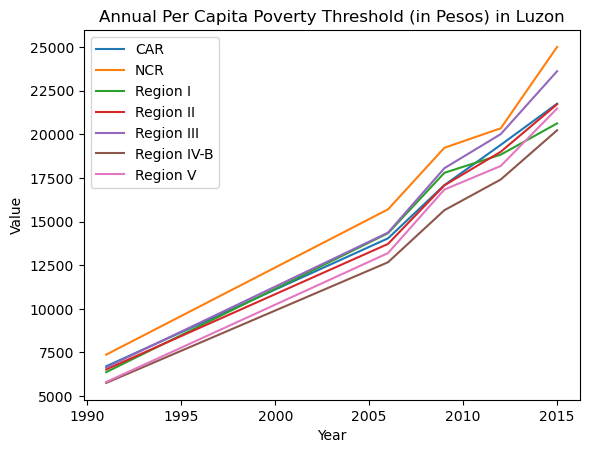

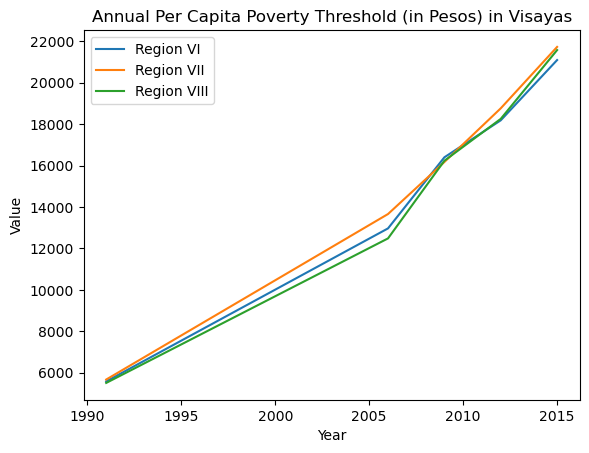

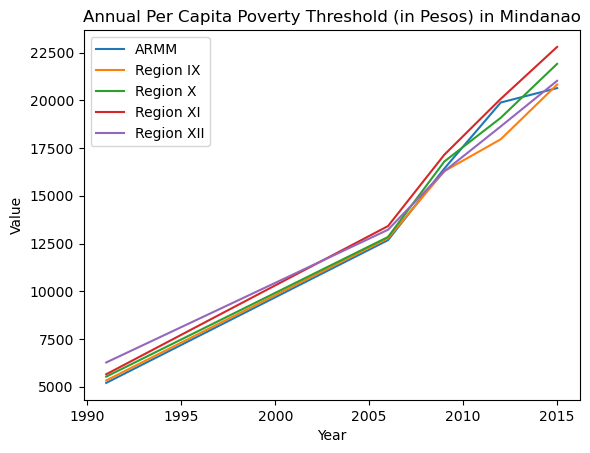

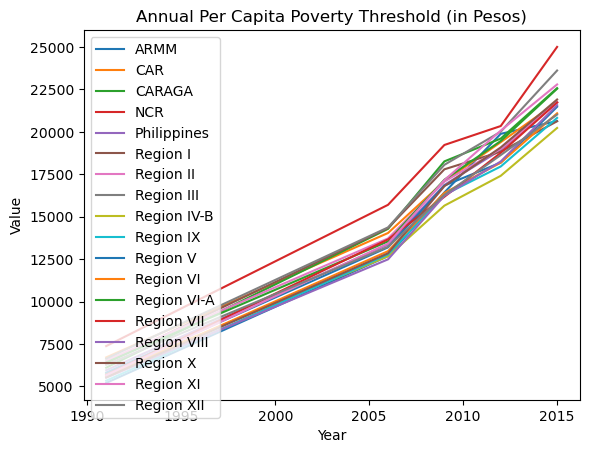

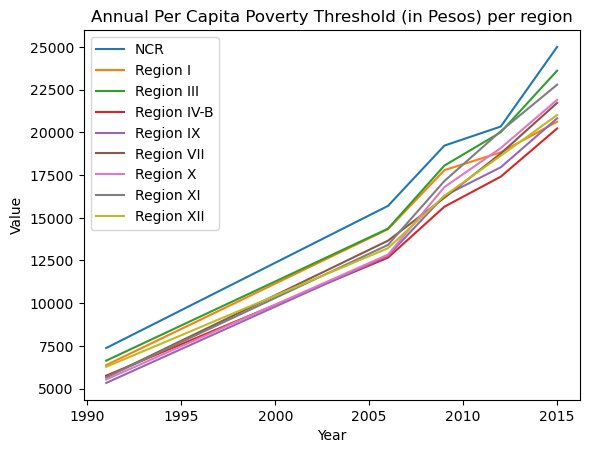

In [334]:
#def graph_df(category, df, specify_region_scope, list_of_regions)
APCPT_df_Luzon = graph_df("Annual Per Capita Poverty Threshold (in Pesos)", df, True, Luzon)
APCPT_df_Vis = graph_df("Annual Per Capita Poverty Threshold (in Pesos)", df, True, Visayas)
APCPT_df_Min = graph_df("Annual Per Capita Poverty Threshold (in Pesos)", df, True, Mindanao)
APCPT_df_all = graph_df("Annual Per Capita Poverty Threshold (in Pesos)", df, False, [])
APCPT_df_Top10 = graph_df("Annual Per Capita Poverty Threshold (in Pesos)", df, True, regions_to_keep)

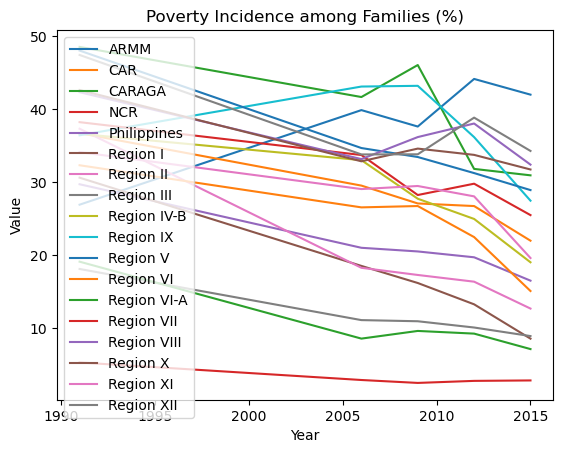

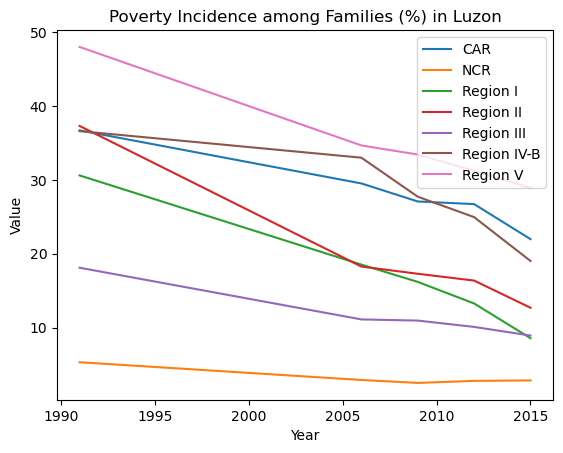

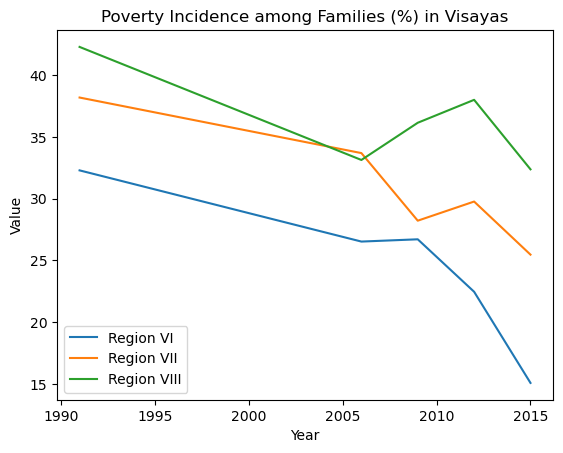

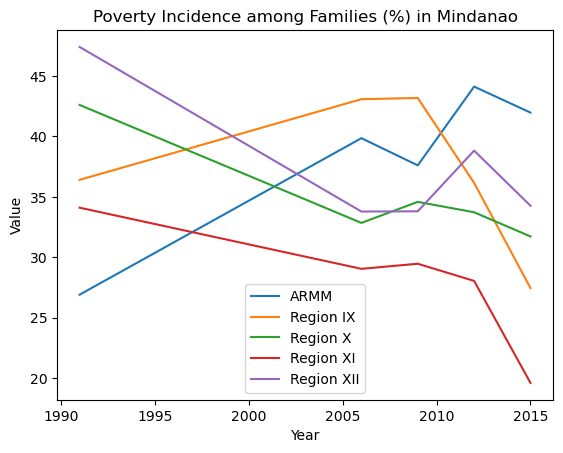

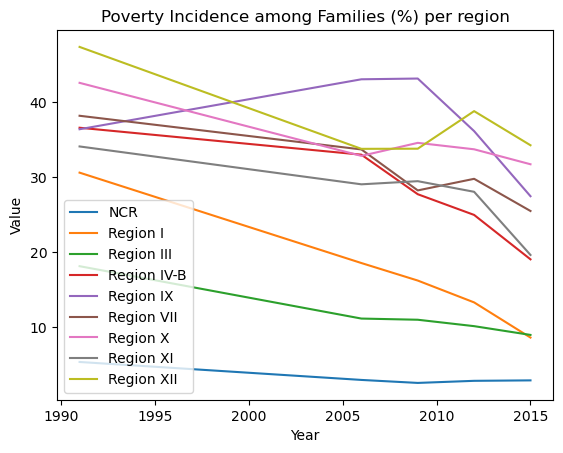

In [335]:
PIF_df_all = graph_df("Poverty Incidence among Families (%)", df, False, [])
PIF_df_Luz = graph_df("Poverty Incidence among Families (%)", df, True, Luzon)
PIF_df_Vis = graph_df("Poverty Incidence among Families (%)", df, True, Visayas)
PIF_df_Min = graph_df("Poverty Incidence among Families (%)", df, True, Mindanao)
PIF_df_Top10 = graph_df("Poverty Incidence among Families (%)", df, True, regions_to_keep)

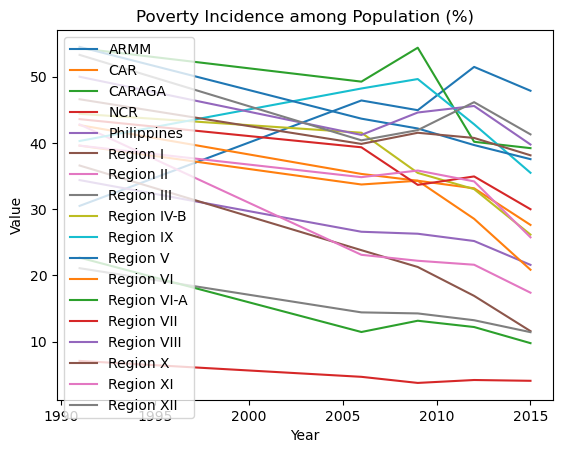

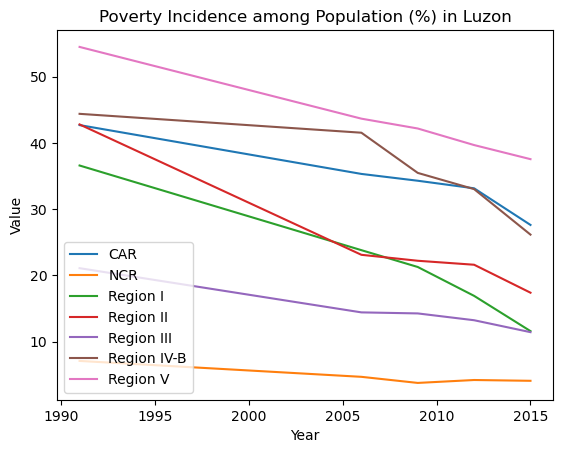

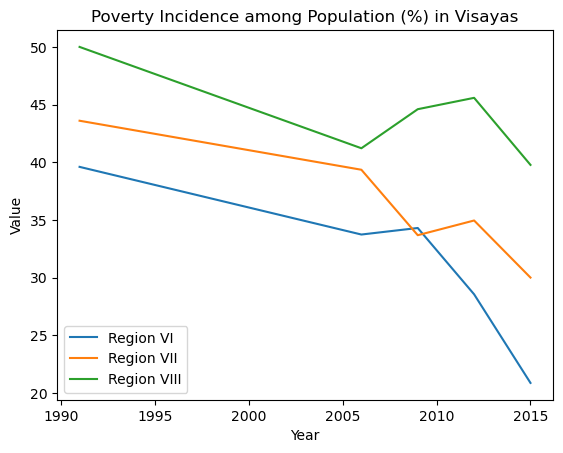

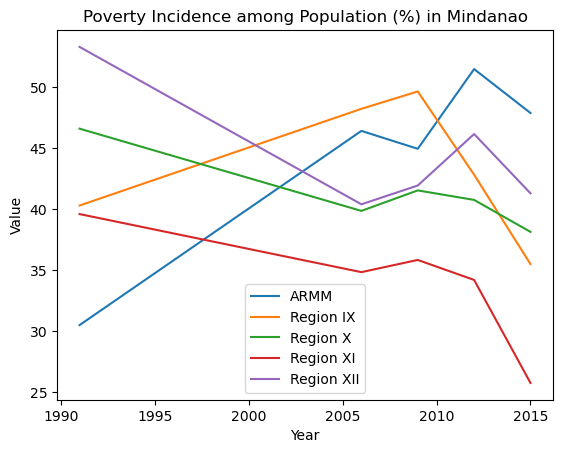

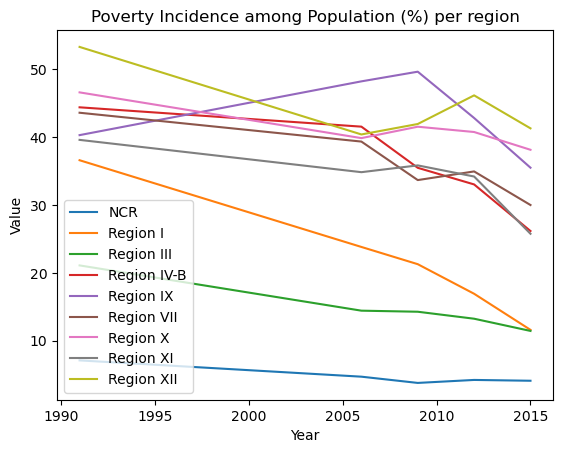

In [336]:
PIP_df_all = graph_df("Poverty Incidence among Population (%)", df, False, regions_to_keep)
PIP_df_Luzon = graph_df("Poverty Incidence among Population (%)", df, True, Luzon)
PIP_df_Vis = graph_df("Poverty Incidence among Population (%)", df, True, Visayas)
PIP_df_Min = graph_df("Poverty Incidence among Population (%)", df, True, Mindanao)
PIP_df_Top10 = graph_df("Poverty Incidence among Population (%)", df, True, regions_to_keep)

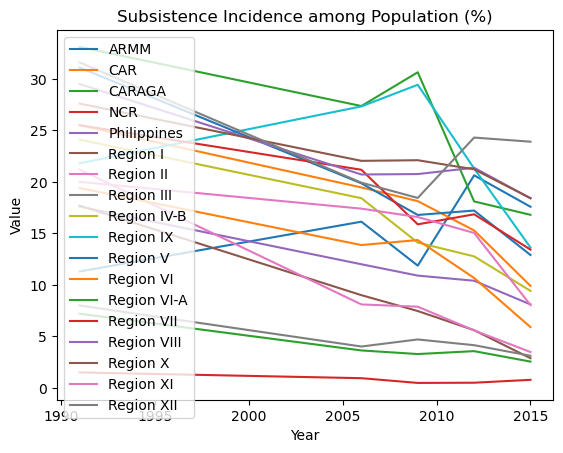

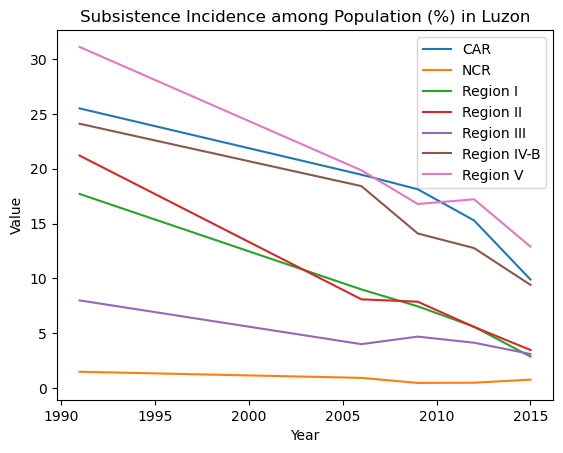

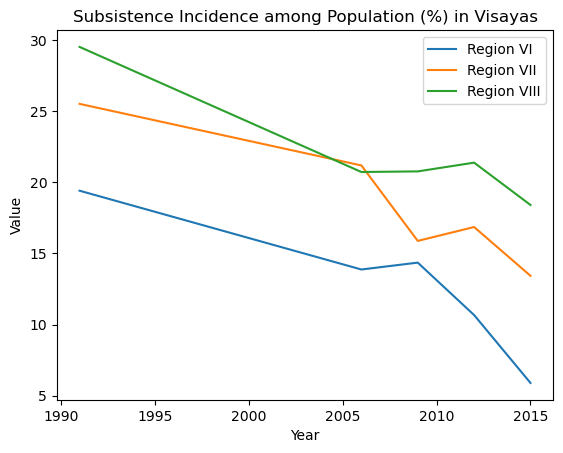

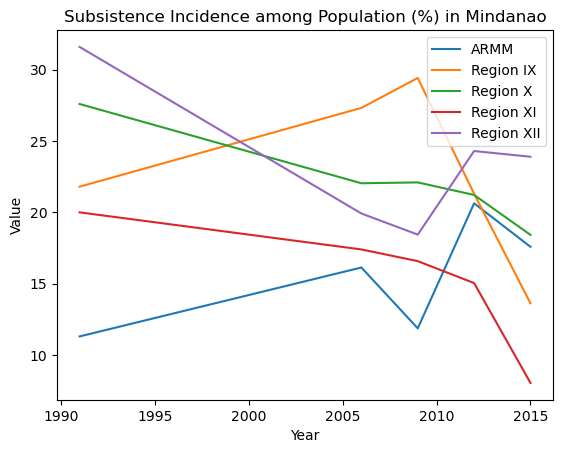

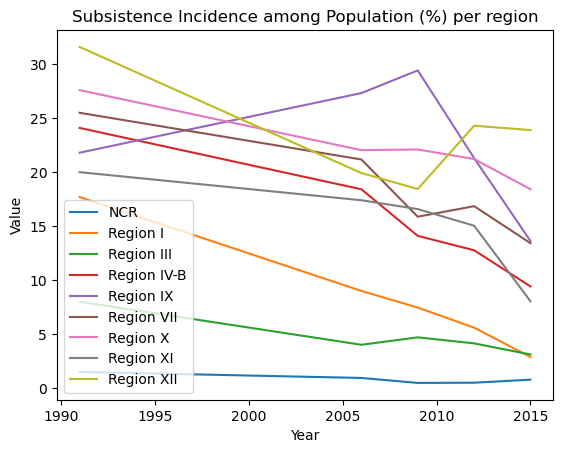

In [345]:
#Subsistence Incidence among Population (%)
category = "Subsistence Incidence among Population (%)"
SIP_df_all = graph_df(category, df, False, regions_to_keep)
SIP_df_Luzon = graph_df(category, df, True, Luzon)
SIP_df_Vis = graph_df(category, df, True, Visayas)
SIP_df_Min = graph_df(category, df, True, Mindanao)
SIP_df_Top10 = graph_df(category, df, True, regions_to_keep)

C:\Users\Norbert\AppData\Local\Temp\ipykernel_7000\3178569733.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SI_df = grouped.apply(lambda x: x.fillna(x.mean()))
C:\Users\Norbert\AppData\Local\Temp\ipykernel_7000\3178569733.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  PI_df = grouped.apply(lambda x: x.fillna(x.mean()))


correlation is 91.81371312829947 %


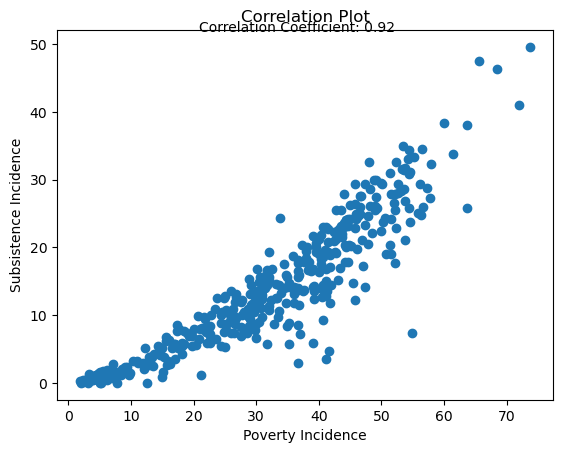

In [365]:
import matplotlib.pyplot as plt
SI_df = SIP_df_all
PI_df = PIP_df_all
grouped = SI_df.groupby(['region', 'Year'])

# fill NaN values with group-wise mean
SI_df = grouped.apply(lambda x: x.fillna(x.mean()))

# reset index
SI_df = SI_df.reset_index(drop=True)
SI_df

grouped = PI_df.groupby(['region', 'Year'])

# fill NaN values with group-wise mean
PI_df = grouped.apply(lambda x: x.fillna(x.mean()))

# reset index
PI_df = PI_df.reset_index(drop=True)
PI_df

corr = SI_df['value'].corr(PI_df['value'])
print("correlation is", corr*100, "%")
# assume df1 and df2 are the two dataframes with the two columns to be correlated
x = PI_df['value']
y = SI_df['value']

# calculate the correlation coefficient
corr = x.corr(y)

# plot the scatter plot with the title and correlation coefficient as the subtitle
plt.scatter(x, y)
plt.title("Correlation Plot")
plt.suptitle("Correlation Coefficient: {:.2f}".format(corr), fontsize=10, y=0.9)
plt.xlabel("Poverty Incidence")
plt.ylabel("Subsistence Incidence")
plt.show()


In [355]:
SI_df = SIP_df_Luzon
PI_df = PIP_df_Luzon
grouped = SI_df.groupby(['region', 'Year'])

# fill NaN values with group-wise mean
SI_df = grouped.apply(lambda x: x.fillna(x.mean()))

# reset index
SI_df = SI_df.reset_index(drop=True)
SI_df

grouped = PI_df.groupby(['region', 'Year'])

# fill NaN values with group-wise mean
PI_df = grouped.apply(lambda x: x.fillna(x.mean()))

# reset index
PI_df = PI_df.reset_index(drop=True)
PI_df

corr = SI_df['value'].corr(PI_df['value'])
print("correlation is", corr*100, "%")

correlation is 93.34218856907486 %


C:\Users\Norbert\AppData\Local\Temp\ipykernel_7000\408060472.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SI_df = grouped.apply(lambda x: x.fillna(x.mean()))
C:\Users\Norbert\AppData\Local\Temp\ipykernel_7000\408060472.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  PI_df = grouped.apply(lambda x: x.fillna(x.mean()))


In [346]:
SIP_df_all['value']

26       1.4
27       0.0
28       0.5
29       1.6
61       0.3
        ... 
3564    27.9
3596    16.5
3597    15.6
3598    11.4
3599     7.5
Name: value, Length: 430, dtype: float64

In [347]:
PIP_df_all['value']

16       4.9
17       5.1
18       6.2
19       5.1
51       4.9
        ... 
3554    51.6
3586    31.7
3587    31.6
3588    32.0
3589    24.8
Name: value, Length: 430, dtype: float64

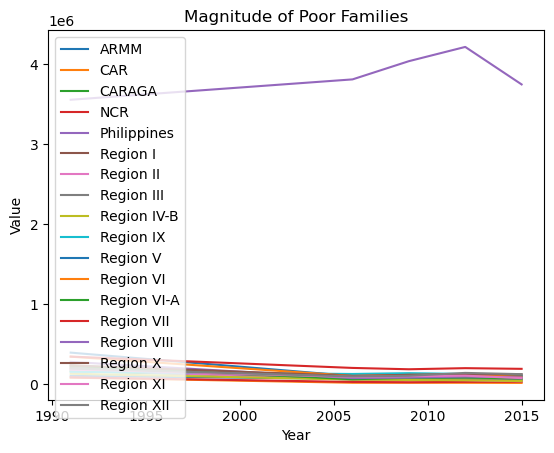

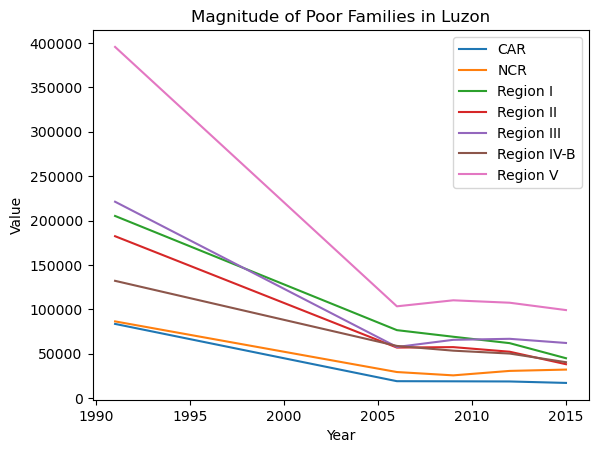

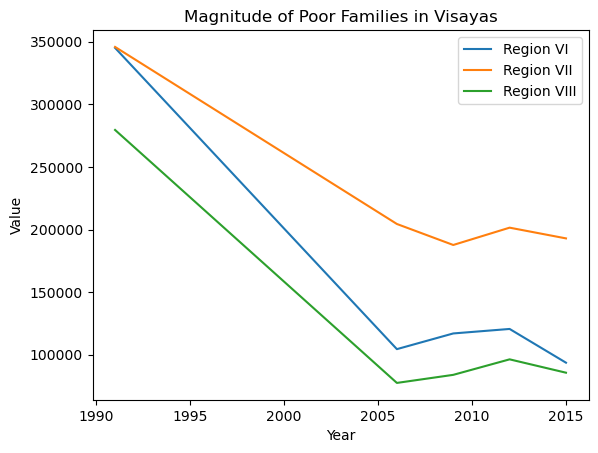

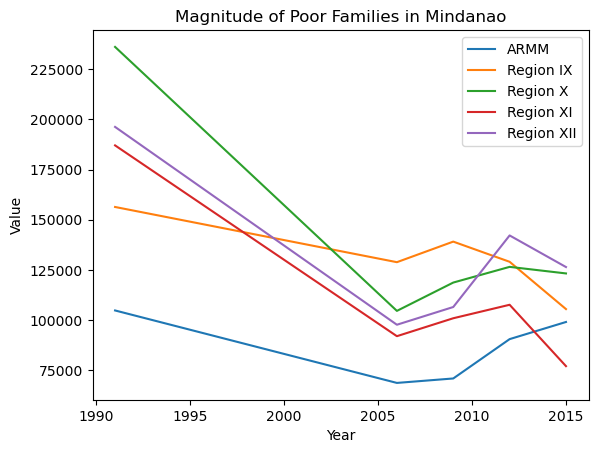

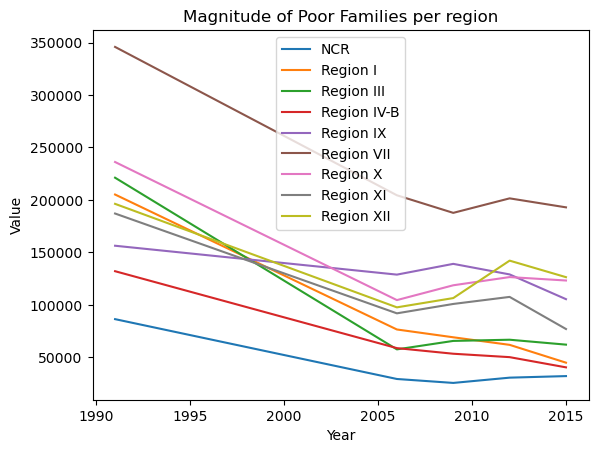

In [339]:
#Magnitude of Poor Families
#
MPF1_df = df.copy()
MPF1_df['value'] = MPF1_df['value'].str.replace('-', '0')
category = "Magnitude of Poor Families"
SIP_df_all = graph_df(category, MPF1_df, False, regions_to_keep)
SIP_df_Luzon = graph_df(category, MPF1_df, True, Luzon)
SIP_df_Vis = graph_df(category, MPF1_df, True, Visayas)
SIP_df_Min = graph_df(category, MPF1_df, True, Mindanao)
SIP_df_Top10 = graph_df(category, MPF1_df, True, regions_to_keep)

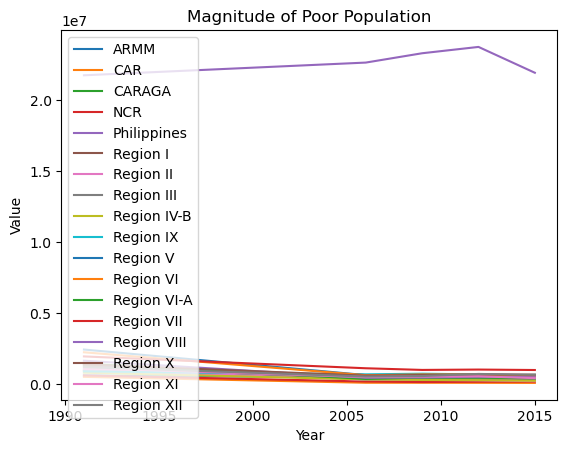

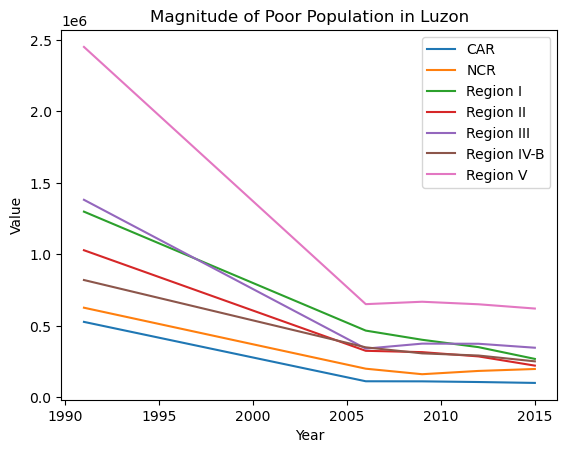

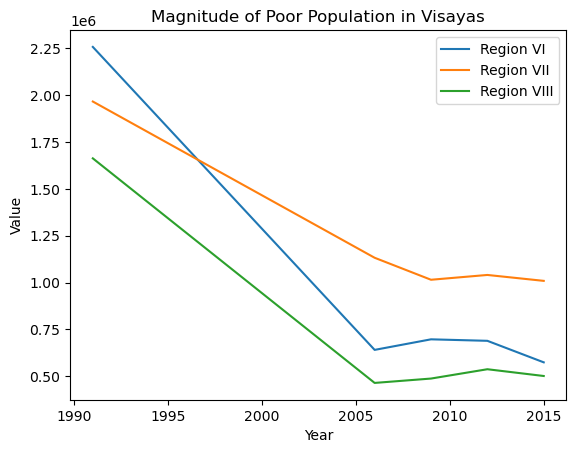

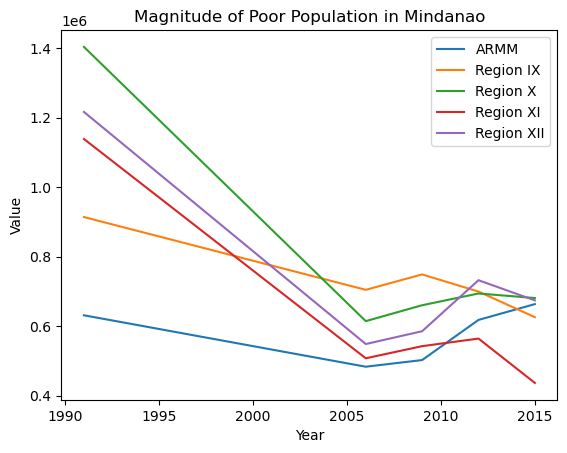

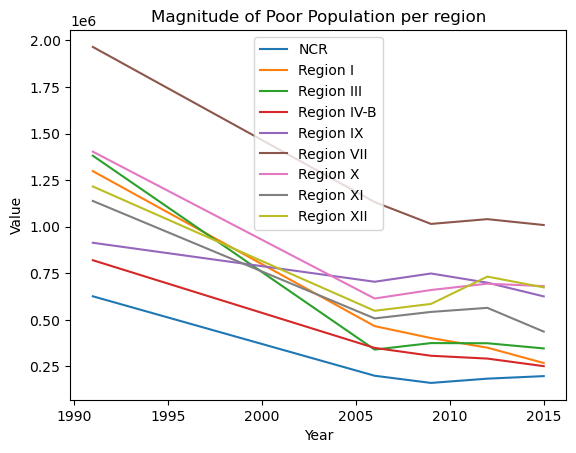

In [340]:
#Magnitude of Poor Population
MPP1_df = df.copy()
MPP1_df['value'] = MPP1_df['value'].str.replace('-', '0')
category = "Magnitude of Poor Population"
SIP_df_all = graph_df(category, MPP1_df, False, regions_to_keep)
SIP_df_Luzon = graph_df(category, MPP1_df, True, Luzon)
SIP_df_Vis = graph_df(category, MPP1_df, True, Visayas)
SIP_df_Min = graph_df(category, MPP1_df, True, Mindanao)
SIP_df_Top10 = graph_df(category, MPP1_df, True, regions_to_keep)

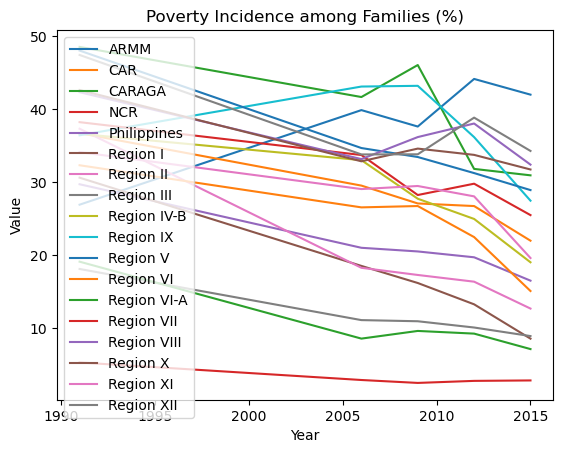

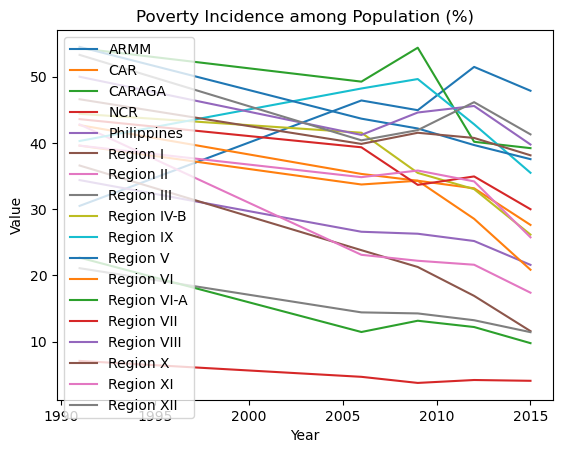

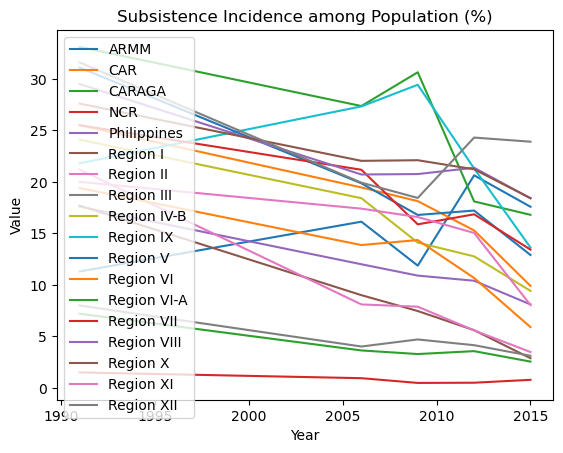

In [357]:
PIF_df_all = graph_df("Poverty Incidence among Families (%)", df, False, [])
PIP_df_all = graph_df("Poverty Incidence among Population (%)", df, False, regions_to_keep)
category = "Subsistence Incidence among Population (%)"
SIP_df_all = graph_df(category, df, False, regions_to_keep)